In [1]:
import pandas as pd
import numpy as np
import os, glob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mypath = os.getcwd()
customers = pd.read_csv(mypath+'/customers_merchants/customers.csv', delimiter = '|') # Customer profiles
static_merchants = pd.read_csv(mypath+'/customers_merchants/merchants_static.csv', delimiter = '|') # Merchant profiles

In [3]:
customers.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num,profile
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Wilton,CT,6897,41.201824,-73.438336,18071,Accounting technician,1966-10-03,888022315787,adults_50up_male_urban.json
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Durham,NC,27713,35.880275,-78.931927,256789,Professor Emeritus,1987-06-07,917558277935,adults_2550_female_urban.json
2,167-48-5821,4192832764832,Melinda,Cameron,F,05641 Robin Port,Sentinel,OK,73664,35.163229,-99.175621,1184,International aid/development worker,1927-05-30,718172762479,adults_50up_female_rural.json
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Elyria,OH,44035,41.371495,-82.102629,64263,Seismic interpreter,1978-12-26,947268892251,adults_2550_male_urban.json
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Covington,GA,30014,33.493859,-83.847186,86177,Medical laboratory scientific officer,1954-05-22,888335239225,adults_50up_female_urban.json


In [4]:
len(customers)

10000

In [5]:
static_merchants.describe()

,lat,long,fraud_risk
count,136120.000000,136120.000000,136120.000000
mean,37.695045,-91.735212,0.035939
std,5.208158,16.129742,0.186138
min,19.179393,-172.314210,0.000000
25%,33.910640,-97.921989,0.000000
50%,38.658165,-87.269947,0.000000
75%,41.394796,-80.120191,0.000000
max,65.259087,-67.632379,1.000000


In [6]:
static_merchants.lat.nunique()


136120

In [7]:
static_merchants.long.nunique()

136120

In [8]:
# Make sure we do have 136120 different merchants

len(static_merchants)

136120

In [9]:
len(static_merchants[static_merchants['fraud_risk'] == 1])/len(static_merchants) # Percentage of compromised merchants

0.035938877461063765

Text(0, 0.5, 'lat')

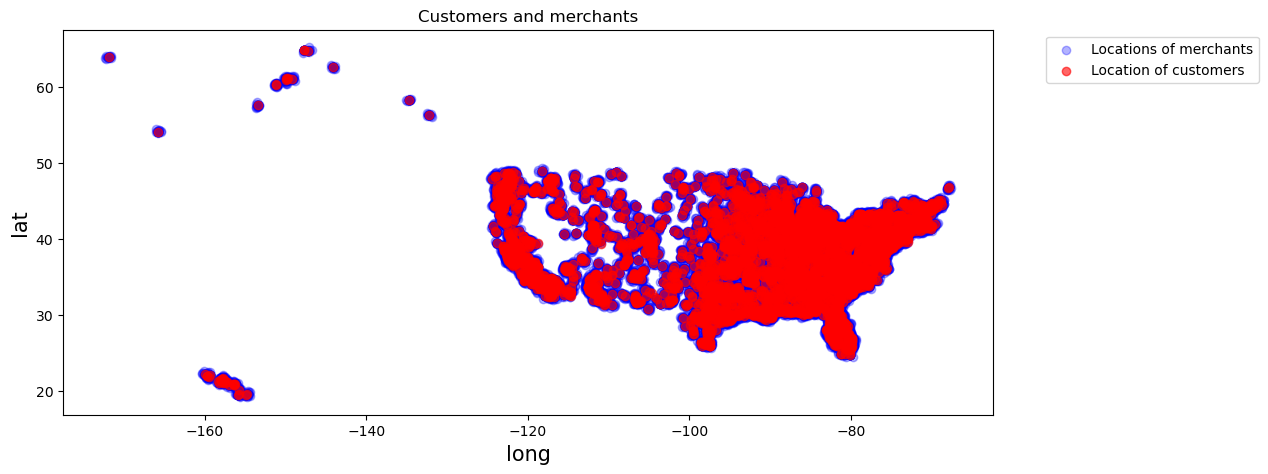

In [10]:
# Draw all the positions of customers and merchants
merchants_vs_customer_fig, ax = plt.subplots(figsize=(12,5))

# Plot locations of terminals
ax.scatter(static_merchants.long.values, 
           static_merchants.lat.values, 
           color='blue', alpha = 0.3, label = 'Locations of merchants')

# Plot location of the last customer

ax.scatter(customers.long, 
           customers.lat, 
           color='red',alpha = 0.6,label="Location of customers")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

fontsize=15

ax.set_title("Customers and merchants")
ax.set_xlabel('long', fontsize=fontsize)
ax.set_ylabel('lat', fontsize=fontsize)


In [11]:
files = glob.glob(mypath + "/data/*.csv")

In [12]:
len(files)

120

In [13]:
# Concate all the .csv files
content = []

for filename in files:
    
    df = pd.read_csv(filename, index_col=None, sep='|')
    content.append(df)

df = pd.concat(content)

In [14]:
len(df)

4323248

In [15]:
df.reset_index(drop = True, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323248 entries, 0 to 4323247
Data columns (total 27 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      object 
 2   first       object 
 3   last        object 
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         object 
 9   lat         float64
 10  long        float64
 11  city_pop    object 
 12  job         object 
 13  dob         object 
 14  acct_num    object 
 15  profile     object 
 16  trans_num   object 
 17  trans_date  object 
 18  trans_time  object 
 19  unix_time   object 
 20  category    object 
 21  amt         float64
 22  is_fraud    object 
 23  merchant    object 
 24  merch_lat   float64
 25  merch_long  float64
 26  is_online   object 
dtypes: float64(5), object(22)
memory usage: 890.6+ MB


In [17]:
df.category.value_counts() # Category counts

shopping_pos      426441
grocery_pos       408499
home              406949
kids_pets         375312
gas_transport     374902
food_dining       325991
shopping_net      315670
entertainment     312572
personal_care     306367
misc_pos          282987
health_fitness    271132
misc_net          195672
grocery_net       183849
travel            136905
Name: category, dtype: int64

In [18]:
len(df[df.is_fraud == 1])/len(df) # The percentage of fraud transactions. If unsatisfied, one can tune the parameters in the program to guarantee a desired results

0.05226903476275245

828-52-8389


Text(0, 0.5, 'lat')

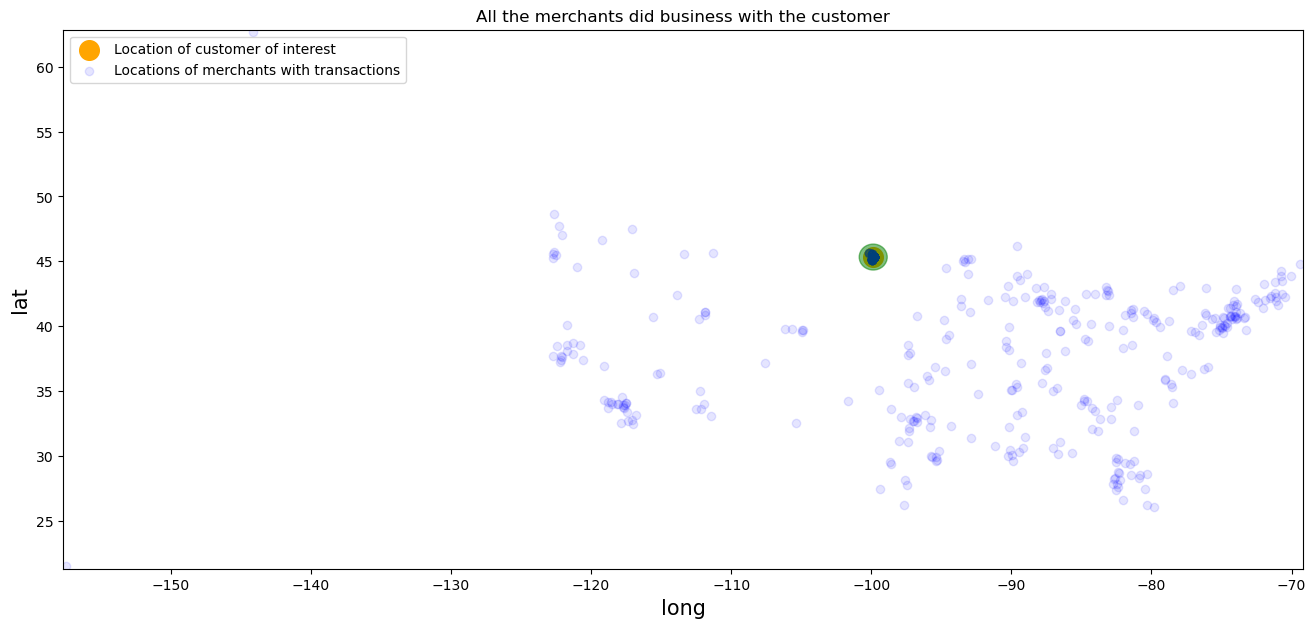

In [19]:
# Pick a random customer with fraud transactions
ssn = df[df.is_fraud == 1].sample(1)['ssn'].values[0]
print(ssn)
df[df.is_fraud == 1].ssn.nunique() # Most of the generated customers encountered fraud scenario in this round

merchants_available_to_customer_fig, ax = plt.subplots(figsize=(16,7))

df_customer = df[df.ssn == ssn].copy()

customer_lat = df_customer.iloc[0]['lat']
customer_long = df_customer.iloc[0]['long']

# Plot 
ax.scatter(customer_long, 
           customer_lat, 
           color='orange',s = 200, label="Location of customer of interest")

# Plot locations of terminals
ax.scatter(df_customer['merch_long'], 
           df_customer['merch_lat'], 
           color='blue', alpha = 0.1, label = 'Locations of merchants with transactions')

ax.legend(loc = 'upper left')

# Plot the region within a radius of 111km (1degree) of the last customer
circ = plt.Circle((customer_long, customer_lat), radius=1, color='g', alpha=0.5)
ax.add_patch(circ)

fontsize=15

ax.set_title("All the merchants did business with the customer")
ax.set_xlim([df_customer['merch_long'].min()-0.2, df_customer['merch_long'].max()+0.2])
ax.set_ylim([df_customer['merch_lat'].min()-0.2, df_customer['merch_lat'].max()+0.2])
    
ax.set_xlabel('long', fontsize=fontsize)
ax.set_ylabel('lat', fontsize=fontsize)

Text(0, 0.5, 'lat')

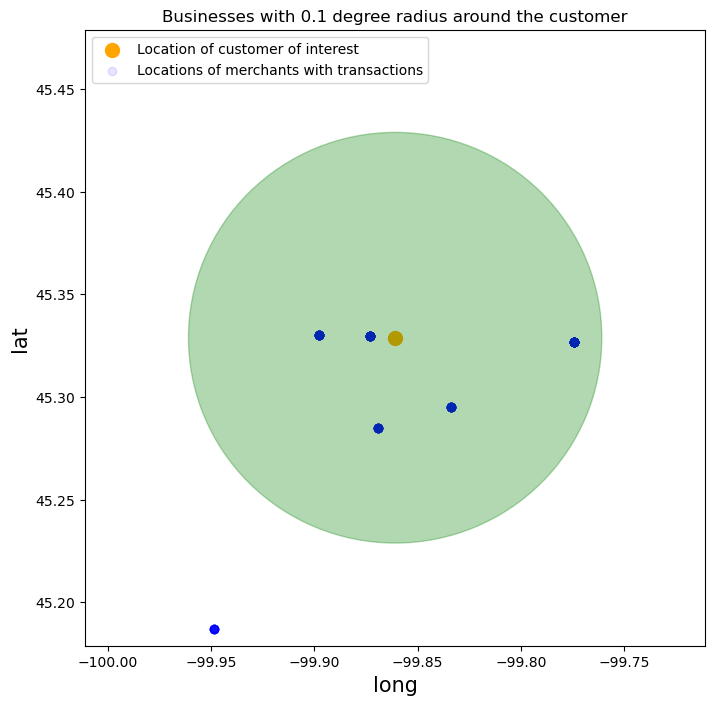

In [20]:
# Zoom in

merchants_available_to_customer_fig, ax = plt.subplots(figsize=(8,8))


# Plot 
ax.scatter(customer_long, 
           customer_lat, 
           color='orange',s = 100, label="Location of customer of interest")

# Plot locations of terminals
ax.scatter(df_customer['merch_long'], 
           df_customer['merch_lat'], 
           color='blue', alpha = 0.1, label = 'Locations of merchants with transactions')

ax.legend(loc = 'upper left')

# Plot the region within a radius of 111km (1degree) of the last customer
circ = plt.Circle((customer_long, customer_lat), radius=0.1, color='g', alpha=0.3)
ax.add_patch(circ)

fontsize=15

ax.set_title("Businesses with 0.1 degree radius around the customer")
ax.set_xlim([customer_long-0.15, customer_long+0.15])
ax.set_ylim([customer_lat.min()-0.15, customer_lat+0.15])
    
ax.set_xlabel('long', fontsize=fontsize)
ax.set_ylabel('lat', fontsize=fontsize)